In [1]:
from RungeKutta4 import RungeKutta4
from matplotlib import pyplot as plt
from sympy import Symbol, Eq, Function, solve, Rational, lambdify, latex
from IPython.display import display
from typing import List

In [2]:
# Just a function to display each equation from Sympy in a visually pleasing latex form
def print_equations(equations: List):
    for equation in equations:
        display(equation)

## Creating the Rayleigh-Plesset in SymPy
I am using SymPy to help simplify the equation. Please view the paper in this assignment to see me manually derive this type of equation by hand. I employed SymPy to make sure I didn't input any wrong variable or accidentally add instead of subtract. You know, the main reason why I don't do well on your exams 😒

Another reason why I am using sympy is that in the event I need to alter an equation or redo a few things, I don't have to do it from scratch, but just plug and chug with SymPy.

### IMPORTANT NOTE
I am NOT using sympy to substitute for the RK4 method, which I have imported above. My RK4 method works genuinely and according to the class requirements. What sympy will do is convert the Rayleigh-Plesset equation into the formats I want (You can see the manual derivation of it in the lab report / paper). The simplified format will then be converted into a numpy-type lambidfy which can be used in place of a function/method in my RK4 class,

In [26]:
rho1 = Symbol("rho_1")
t = Symbol("t")
R = Function("R")(t)
R_ = R.diff()
R__ = R.diff().diff()
P0 = Symbol("P_0")
mu = Symbol("mu")
sigma = Symbol("sigma")

variables = {
    rho1: 997,                # Density of water
    P0: -9.81 * 997 * 1000,   # Assume constant throughout process
    mu: 0.0013076,
    sigma: 0.072
}
print("Substitution Values")
print_equations([
    Eq(rho1, variables[rho1]),
    Eq(P0, variables[P0]),
    Eq(mu, variables[mu]),
    Eq(sigma, variables[sigma]),
])


lhs = rho1 * (R * R__ + Rational(3 / 2) * R_ ** 2)
rhs = - P0 - 4 * mu * (1 / R) * R_ - 2 * sigma / R
eqn = Eq(lhs, rhs)

print("\n\nRayleigh-Plesset equation")
print_equations([eqn])

Substitution Values


Eq(rho_1, 997)

Eq(P_0, -9780570.0)

Eq(mu, 0.0013076)

Eq(sigma, 0.072)



Rayleigh-Plesset equation


Eq(rho_1*(R(t)*Derivative(R(t), (t, 2)) + 3*Derivative(R(t), t)**2/2), -P_0 - 4*mu*Derivative(R(t), t)/R(t) - 2*sigma/R(t))

In [4]:
# Solve the equations for the first and second derivatives
# Note that for the first derivative, we get two potential answers. We'll explore each of those answers later
dRdt1, dRdt2 = solve(eqn, R_)
d2Rdt2 = solve(eqn, R__)[0]

print_equations([Eq(R_, dRdt1), Eq(R_, dRdt2), Eq(R__, d2Rdt2)])

Eq(Derivative(R(t), t), (-4*mu/3 + sqrt(-6*P_0*rho_1*R(t)**2 + 16*mu**2 - 6*rho_1**2*R(t)**3*Derivative(R(t), (t, 2)) - 12*rho_1*sigma*R(t))/3)/(rho_1*R(t)))

Eq(Derivative(R(t), t), -(4*mu/3 + sqrt(-6*P_0*rho_1*R(t)**2 + 16*mu**2 - 6*rho_1**2*R(t)**3*Derivative(R(t), (t, 2)) - 12*rho_1*sigma*R(t))/3)/(rho_1*R(t)))

Eq(Derivative(R(t), (t, 2)), -(P_0*R(t) + 4*mu*Derivative(R(t), t) + 3*rho_1*R(t)*Derivative(R(t), t)**2/2 + 2*sigma)/(rho_1*R(t)**2))

In [5]:
# Substitute 
dRdt1 = dRdt1.subs(variables).simplify().evalf()
dRdt2 = dRdt2.subs(variables).simplify().evalf()
d2Rdt2 = d2Rdt2.subs(variables).simplify().evalf()

print_equations([Eq(R_, dRdt1), Eq(R_, dRdt2), Eq(R__, d2Rdt2)])

Eq(Derivative(R(t), t), (80.8702664766229*(-0.000101936799184506*R(t)**3*Derivative(R(t), (t, 2)) + R(t)**2 - 1.47230682874311e-8*R(t) + 4.67583558816124e-16)**0.5 - 1.74871280508191e-6)/R(t))

Eq(Derivative(R(t), t), -(80.8702664766229*(-0.000101936799184506*R(t)**3*Derivative(R(t), (t, 2)) + R(t)**2 - 1.47230682874311e-8*R(t) + 4.67583558816124e-16)**0.5 + 1.74871280508191e-6)/R(t))

Eq(Derivative(R(t), (t, 2)), 0.5*(-3.0*R(t)*Derivative(R(t), t)**2 + 19620.0*R(t) - 1.04922768304915e-5*Derivative(R(t), t) - 0.000288866599799398)/R(t)**2)

In [6]:
function_dR_dt1 = lambdify([R, R__, t], dRdt1)
function_dR_dt2 = lambdify([R, R__, t], dRdt2)

function_d2R_dt2 = lambdify([R, R_, t], d2Rdt2)

In [7]:
function = RungeKutta4(
    dt=0.01,
    dr_dt=function_dR_dt2,
    d2r_dt2=function_d2R_dt2
)

In [49]:
data = function(
    r=100,           # Starting R value
    dr_dt=-0.001,    # Program breaks if dr_dt starts at 0
    t=0,             # Starting t value (almost always at 0)
    steps=1400       # Number of steps to run
)
data.keys()

Generating values:   0%|          | 0/1400 [00:00<?, ?it/s]

dict_keys(['r', 'dr_dt', 'd2r_dt2', 't'])

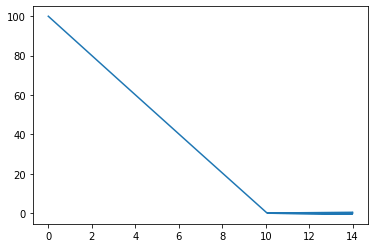

In [50]:
plt.plot(data["t"], data["r"])

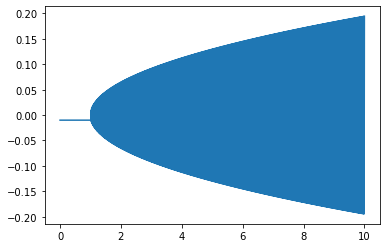

In [19]:
plt.plot(data["t"], data["dr_dt"])

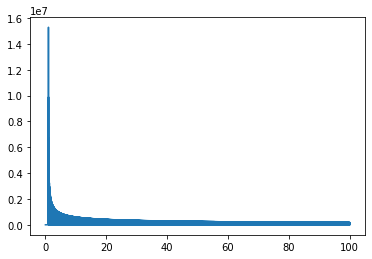

In [12]:
plt.plot(data["t"], data["d2r_dt2"])